# Exploring the Data
- I want to see which lines and cars received the most complaints
- I also want to look at dates, and see which months and days received the most complaints
    - I'm assuming there will be an increase during the summer months when it is generally hotter and also during weekdays, when many people are commuting to work

In [20]:
import pandas as pd

In [21]:
data = pd.read_csv('C:\\Users\\606569\\Documents\\my_GitHub\\D.C-metro-analysis\\data\\cleaned\\hotcars_clean.csv')

In [73]:
data = data.drop(columns = {'workday'})

In [74]:
data.head()

,Unnamed: 0,car_number,color,time_stamp,text,handle,user_id,full_date,year,month,day,season,weekday
0,0,1001,RED,2013-05-28 12:39:54+00:00,"Was just on metro hot car #1001 (red line), an...",CarChickMWB,18249348,2013-05-28,2013,5,28,2,1
1,1,1188,RED,2013-05-28 12:50:53+00:00,@FixWMATA @unsuckdcmetro @wmata RL #HotCar 118...,DiavoJinx,403520304,2013-05-28,2013,5,28,2,1
2,2,1068,GREEN,2013-05-28 21:06:20+00:00,"oh good, another hot car on the metro. green l...",lexilooo,16174883,2013-05-28,2013,5,28,2,1
3,3,2066,ORANGE,2013-05-28 21:15:23+00:00,#HotCar 2066 on OL to New Carrollton. Air is ...,TheHornGuy,40506740,2013-05-28,2013,5,28,2,1
4,4,1043,BLUE,2013-05-28 22:08:07+00:00,Car 1043 on the blue line heading to Largo is ...,jessydumpling,263763147,2013-05-28,2013,5,28,2,1


In [77]:
data.weekday.value_counts()

1    1395
2    1306
3    1210
0    1106
4    1050
5     227
6     146
Name: weekday, dtype: int64

In [61]:
data.loc[data['color'].isin(['RED'])].car_number.value_counts().head(10)

1124    21
6004    18
1069    15
1117    14
1144    13
4090    12
1043    12
4053    11
1118    11
1042    10
Name: car_number, dtype: int64

In [64]:
data.loc[data['color'].isin(['ORANGE'])].car_number.value_counts().head()

3024    11
1292     9
6044     8
6081     8
1263     8
Name: car_number, dtype: int64

In [65]:
pip install wordcloud

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

SyntaxError: invalid syntax (<ipython-input-65-cb10c2d9ee84>, line 1)

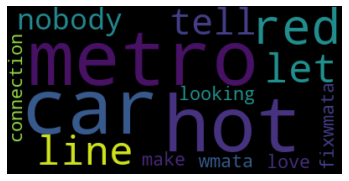

In [66]:
# Start with one tweet:
text = data.text[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [67]:
data.shape

(6440, 14)

In [68]:
data.dtypes

Unnamed: 0     int64
car_number     int64
color         object
time_stamp    object
text          object
handle        object
user_id        int64
full_date     object
year           int64
month          int64
day            int64
season         int64
weekday        int64
workday        int64
dtype: object

In [28]:
data.day.value_counts().head()

18    278
19    272
17    267
26    259
11    249
Name: day, dtype: int64

**most complaints were made in the middle-*ish* of the month**

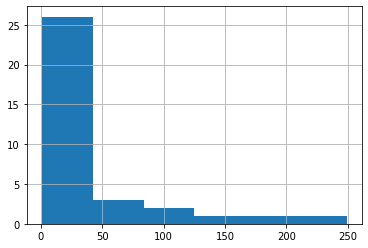

In [57]:
data.car_number.value_counts().value_counts().hist(bins = 6)

1     249
2     171
3     127
4     119
5      95
6      68
7      54
8      48
9      38
10     38
11     28
12     29
13     11
14     13
15     12
16     14
17      9
18      5
19      7
20      5
21      3
22      4
23      1
24      3
25      3
26      2
27      4
28      1
30      1
31      1
32      2
39      1
43      1
48      1
Name: car_number, dtype: int64


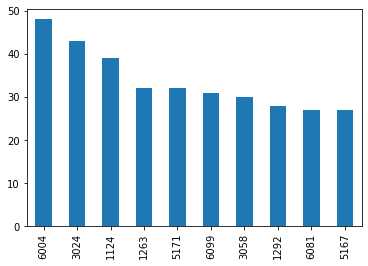

In [45]:
print(data.car_number.value_counts().value_counts().sort_index())

data.car_number.value_counts().head(10).plot.bar()

**This gives us the top 10 cars that received the most complaints**  
**Car 6004 really needs to get it's AC fixed**

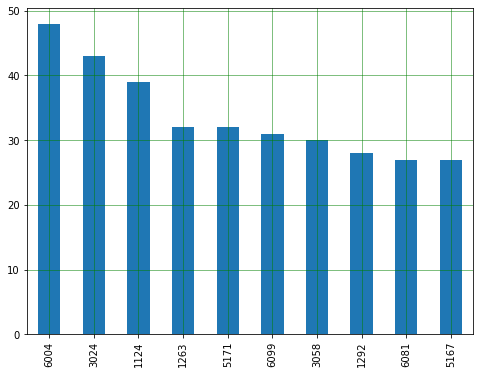

In [30]:
data.car_number.value_counts().head(10).plot(kind='bar',figsize=(8 ,6));
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green');
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black');
plt.show()

RED       1705
ORANGE    1053
YELLOW     535
BLUE       436
NONE       400
GREEN      356
SILVER     309
Name: color, dtype: int64


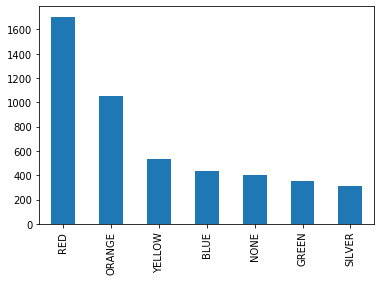

In [31]:
print(data.color.value_counts())

data.color.value_counts().plot.bar()

**The number of complaints per line.  
Red line wins by a landslide.**

In [41]:
print(data.shape)
print(data.handle.value_counts().head(25).sum())

(6440, 14)
926


**Top 25 tweeters are responsible for 15% of hotcar tweets**

EdChernosky        125
LowHeadways        104
UnleafTheKraken     49
Tracktwentynine     39
rmwc1995            38
HakunaWMATA         38
KathrynAegis        38
goldsmitht          37
pjroddyjr           35
lissabrennan        34
Name: handle, dtype: int64


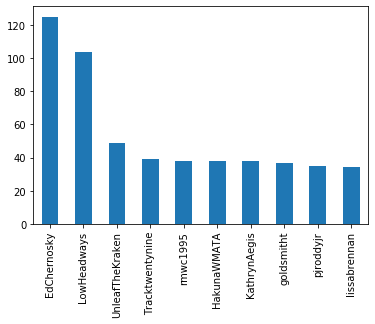

In [39]:
print(data.handle.value_counts().head(10))

data.handle.value_counts().head(10).plot.bar()

**The top 10 twitter users that tweet the most hotcar complaints. 
We can assume they are very usual metro riders...**

1    1395
2    1306
3    1210
0    1106
4    1050
5     227
6     146
Name: weekday, dtype: int64


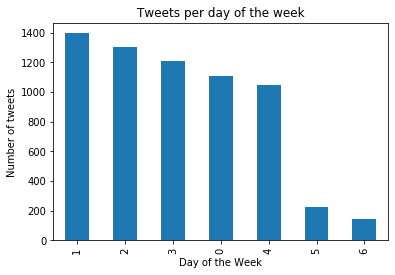

In [33]:
print(data.weekday.value_counts())

import matplotlib.pyplot as plt
data.weekday.value_counts().plot.bar();
plt.title('Tweets per day of the week')
plt.xlabel('Day of the Week');
plt.ylabel('Number of tweets');
plt.show()

**Number of complaints received per day of week.**  
**Workdays (Mon-Fri) receive the overwhemling amount of complaints**

2016    2235
2015    1184
2014     856
2013     854
2017     794
2018     514
2019       3
Name: year, dtype: int64


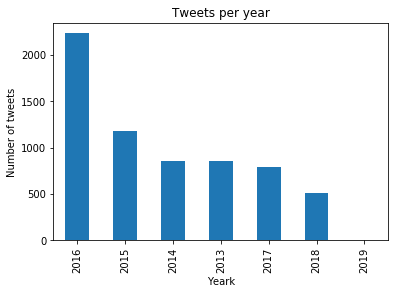

In [34]:
print(data.year.value_counts())

data.year.value_counts().plot.bar();
plt.title('Tweets per year')
plt.xlabel('Yeark');
plt.ylabel('Number of tweets');
plt.show()

**Number of complaints received per year.**  
**There has been a steady decrease since 2016.  This could also be from reporting issues, so it should be taken with a grain of salt.**

3    4071
2    1934
4     311
1     124
Name: season, dtype: int64


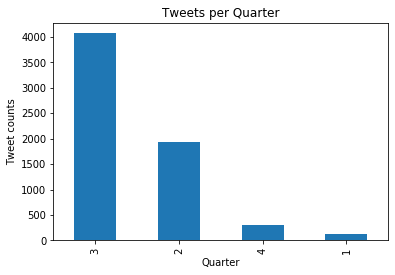

In [35]:
print(data.season.value_counts())

data.season.value_counts().plot.bar();
plt.title('Tweets per Quarter');
plt.xlabel('Quarter');
plt.ylabel('Tweet counts');
plt.show()

**Number of complaints received per quarter(season).**  
**BIggest number of tweets/complaints are in quarters 2 and 3 (April - September) the hottest months in D.C.**

In [ ]:
# My Findings
- Most complaints during quarters 2 and 3
- Most complaints during work days
- 

# Modeling the Data
- I'm not sure what to predict here.  
    - I'm thinking we could predict what days are most likely to have a hot car. 
    - We can do this by season, month, and day (work day or not)